### Папка с изображениями ###

In [1]:
base_dir = 'C:\\Users\\Гильманов\\Documents\\Python Projects\\mlflow\\dataset\\Symbols' # Тут лежат необработанные изображения

### Нормировка изображений ###

In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import matplotlib.pyplot as plt

img_height, img_width = 128, 128 
normalized_dir = os.path.join('C:\\Users\\Гильманов\\Documents\\Python Projects\\mlflow\\dataset', 'normalized_images')
os.makedirs(normalized_dir, exist_ok=True)

allowed_extensions = {'.jpg', '.jpeg', '.png'}

images = []  
labels = []  
image_counts = []  
class_names = []  

for idx, folder in enumerate(os.listdir(base_dir)):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):  
        class_dir = os.path.join(normalized_dir, folder)
        os.makedirs(class_dir, exist_ok=True)

        image_count = 0  
        
        for filename in os.listdir(folder_path):
            file_extension = os.path.splitext(filename)[1].lower()
            if file_extension in allowed_extensions:
                img_path = os.path.join(folder_path, filename)
                try:
                    img = Image.open(img_path).convert('RGB')  
                    img = img.resize((img_height, img_width))  
                    img_array = img_to_array(img) / 255.0  
                    
                    images.append(img_array)
                    labels.append(idx)
                    
                    normalized_img = Image.fromarray((img_array * 255).astype(np.uint8))  
                    normalized_img_path = os.path.join(class_dir, filename)
                    normalized_img.save(normalized_img_path)
                    
                    image_count += 1  
                    
                except Exception as e:
                    print(f"Ошибка при загрузке изображения {img_path}: {e}")
        
        image_counts.append(image_count)  
        class_names.append(folder)  

images = np.array(images)
labels = np.array(labels)

### Гистограмма с количеством изображений ###

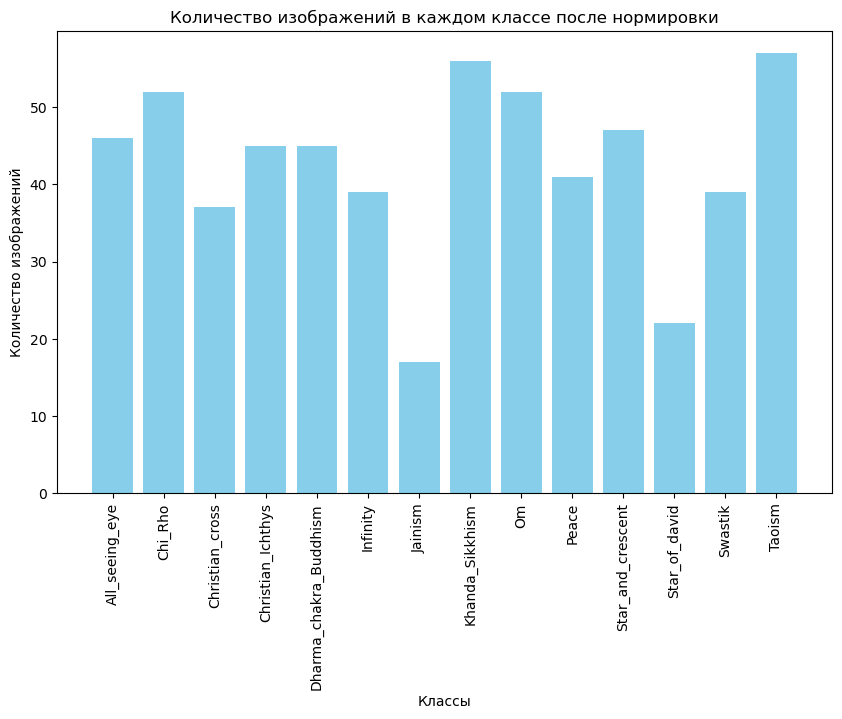

In [3]:
plt.figure(figsize=(10, 6))
plt.bar(class_names, image_counts, color='skyblue')
plt.xlabel('Классы')
plt.ylabel('Количество изображений')
plt.title('Количество изображений в каждом классе после нормировки')
plt.xticks(rotation=90)
plt.show()

### Свёрточная нейронная сеть ###

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import img_to_array
from PIL import Image

img_height, img_width = 128, 128 
base_dir = 'C:\\Users\\Гильманов\\Documents\\Python Projects\\mlflow\\dataset\\normalized_images'
num_classes = len(os.listdir(base_dir))  

allowed_extensions = {'.jpg', '.jpeg', '.png'}

images = []
labels = []

for idx, folder in enumerate(os.listdir(base_dir)):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            file_extension = os.path.splitext(filename)[1].lower()
            if file_extension in allowed_extensions:
                img_path = os.path.join(folder_path, filename)
                try:
                    img = Image.open(img_path).convert('RGB')  
                    img_array = img_to_array(img) / 255.0  
                    images.append(img_array)
                    labels.append(idx)
                except Exception as e:
                    print(f"Ошибка при загрузке изображения {img_path}: {e}")

images = np.array(images)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

model = Sequential([
    Input(shape=(img_height, img_width, 3)),  
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(
    rotation_range=0, 
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

batch_size = 32
epochs = 25
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    epochs=epochs)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Точность на тестовом множестве: {test_acc:.2f}")

Epoch 1/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 445ms/step - accuracy: 0.0561 - loss: 2.7721 - val_accuracy: 0.1261 - val_loss: 2.6325
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 429ms/step - accuracy: 0.1267 - loss: 2.6373 - val_accuracy: 0.1092 - val_loss: 2.5694
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 433ms/step - accuracy: 0.1252 - loss: 2.5387 - val_accuracy: 0.1681 - val_loss: 2.4958
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 426ms/step - accuracy: 0.2097 - loss: 2.4727 - val_accuracy: 0.2857 - val_loss: 2.3075
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 438ms/step - accuracy: 0.2798 - loss: 2.2600 - val_accuracy: 0.3697 - val_loss: 2.0553
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 439ms/step - accuracy: 0.2781 - loss: 2.1605 - val_accuracy: 0.5126 - val_loss: 1.8334
Epoch 7/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 464ms/step - accuracy: 0.3749 - loss: 1.9379 - val_accuracy: 0.5378 - val_loss: 1.6539
Epoch 8/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 461ms/step - accuracy: 0.4346 - loss: 1.7760 - val_accuracy: 0.

### Проверка модели пользователем ###

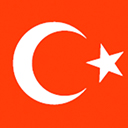

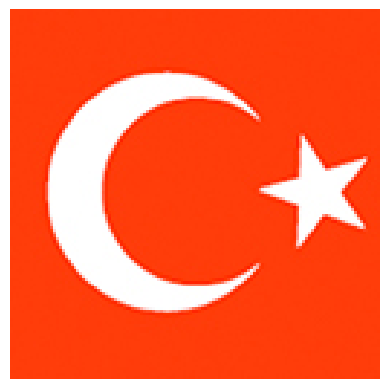

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Предсказанный класс: Taoism, уверенность: 0.66


In [5]:
from IPython.display import display
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog

class_names = {idx: folder for idx, folder in enumerate(os.listdir(base_dir))}

def preprocess_image(img_path):
    img = Image.open(img_path).convert('RGB')  
    img = img.resize((img_height, img_width))  
    img_array = img_to_array(img) / 255.0  
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

def choose_image():
    Tk().withdraw() 
    img_path = filedialog.askopenfilename()
    return img_path

img_path = choose_image()  
img = preprocess_image(img_path)  

display(Image.open(img_path))
plt.imshow(np.squeeze(img), interpolation='nearest')
plt.axis('off')
plt.show()

predictions = model.predict(img)
predicted_class = np.argmax(predictions)
confidence = predictions[0][predicted_class]
predicted_label = class_names[predicted_class]

img_in_train = any(np.array_equal(img, x) for x in X_train)
img_in_test = any(np.array_equal(img, x) for x in X_test)
if img_in_train:
    dataset_info = "Изображение найдено в обучающем наборе"
elif img_in_test:
    dataset_info = "Изображение найдено в тестовом наборе"
else:
    dataset_info = "Изображение не найдено в обучающем или тестовом наборе"

print(f"Предсказанный класс: {predicted_label}, уверенность: {confidence:.2f}")
#print(dataset_info)